<a href="https://colab.research.google.com/github/ravishnirala/DeepLearning/blob/main/Deeplearning_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM: To implement Charater Recognition using CNN

*importing some important library*

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

*Loading the mnist data*

In [ ]:
(x_train ,y_train) ,(x_test ,y_test) =mnist.load_data()

*Processing the data*

In [ ]:
x_train =x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test =x_test.reshape(-1,28,28,1).astype('float32')/255.0

*Definig the CNN architecture*

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*Compile the model*

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

*Train the CNN*

In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 78ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9896 - val_loss: 0.0320
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9899 - val_loss: 0.0331
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9904 - val_loss: 0.0341
Epoch 5/5
401/938 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - accuracy: 0.9963 - loss: 0.0097

*Evaluate the model*

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Test Loss:{loss:.4f}')
print(f'Test Accuracy:{accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9872 - loss: 0.0395
Test Loss:0.0319
Test Accuracy:99.01%


*Showing no of images in pixel form*

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

*Showing the image at 0 index*

In [ ]:
y_train[0]

5

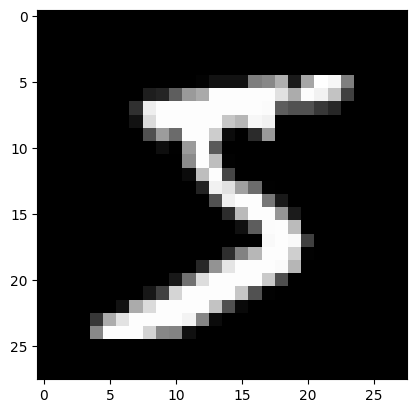

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.show()

*It show the probability of image from 0 to 9 on particular index *

In [ ]:
y_prob=model.predict(x_test)
y_prob[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([4.8816879e-09, 1.7121513e-08, 6.0986264e-07, 2.5986419e-06,
       3.4181525e-07, 7.8112708e-07, 5.9240876e-11, 9.9999112e-01,
       8.7935568e-08, 4.3007867e-06], dtype=float32)

*This code predict which image exactly on particular index*

In [ ]:
y_pred=y_prob.argmax(axis=1)
y_pred[0]

7

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9901


Text(0.5, 0, 'Epoch')

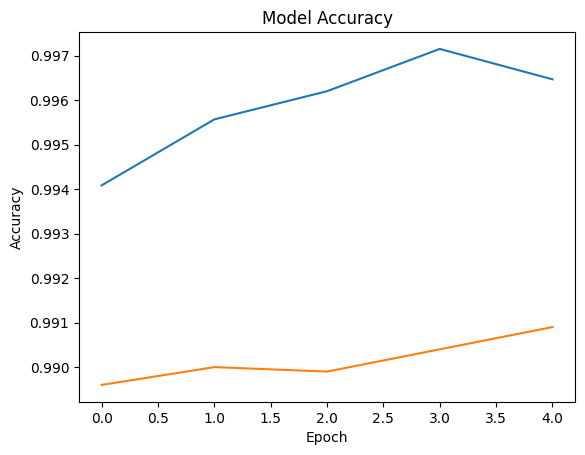

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Conclusion :
For example, A categorization accuracy of 99.01% indicates that you have correctly classified all but 0.99% of the images.
